In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [20]:
time_inter0_doF1=pd.read_csv('runtime_kdd.csv',header=0)
time_inter3_doF1=pd.read_csv('parity_inter3.csv',header=0)

time_inter0_cpF1=pd.read_csv('run_CPLEX_F1inter0.csv',header=None)
time_inter3_cpF1=pd.read_csv('run_CPLEX_F1inter3.csv',header=None)
time_inter0_cpF2=pd.read_csv('run_CPLEX_F2inter0.csv',header=None)
time_inter3_cpF2=pd.read_csv('run_CPLEX_F2inter3.csv',header=None)

time_sdpF2=pd.read_csv('SDPtime_F2_21.csv',header=0)
time_inter0_sdpF2=time_sdpF2[['size','runInter0']]
time_inter3_sdpF2=time_sdpF2[['size','runInter3']]

In [16]:
def prep(df):
    df.columns = ['size','runtime']
    m=df.groupby('size').agg(np.mean)
    st=df.groupby('size').agg(np.std)

    x=m.index*(m.index+1)
    y=m['runtime'].tolist()
    ym=m['runtime']-st['runtime']
    yp=m['runtime']+st['runtime']
    
    return x,y,ym,yp

C:\Users\zhouq\anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


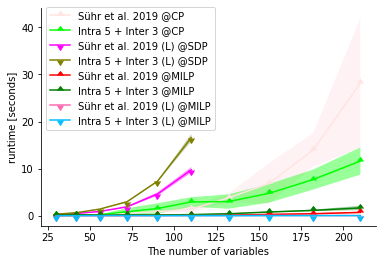

In [22]:
'''
CPLEX=MILP
docplexCPLEX CP=CP
TSSOS=SDP
'''

x,y,y1,y2=prep(time_inter0_doF1)

plt.plot(x,y, color='mistyrose',marker=10, label='Sühr et al. 2019 @CP')
plt.fill_between(x,y1,y2,facecolor = "pink",alpha=0.2)


x,y,y1,y2=prep(time_inter3_doF1[['size','runtime']])

plt.plot(x,y, color='lime',marker=10, label='Intra 5 + Inter 3 @CP')
plt.fill_between(x,y1,y2,facecolor = "lime",alpha=0.4)


x,y,y1,y2=prep(time_inter0_sdpF2)

plt.plot(x,y, color='magenta',marker=11, label='Sühr et al. 2019 (L) @SDP')
plt.fill_between(x,y1,y2,facecolor = "magenta",alpha=0.4)


x,y,y1,y2=prep(time_inter3_sdpF2)

plt.plot(x,y, color='olive',marker=11, label='Intra 5 + Inter 3 (L) @SDP')
plt.fill_between(x,y1,y2,facecolor = "olivedrab",alpha=0.4)


x,y,y1,y2=prep(time_inter0_cpF1)

plt.plot(x,y, color='red',marker=10,label='Sühr et al. 2019 @MILP')
plt.fill_between(x,y1,y2,facecolor = "red",alpha=0.4)

x,y,y1,y2=prep(time_inter3_cpF1)

plt.plot(x,y, color='g',marker=10,label='Intra 5 + Inter 3 @MILP')
plt.fill_between(x,y1,y2,facecolor = "green",alpha=0.4)


x,y,y1,y2=prep(time_inter0_cpF2)

plt.plot(x,y, color='hotpink',marker=11,label='Sühr et al. 2019 (L) @MILP')
plt.fill_between(x,y1,y2,facecolor = "hotpink",alpha=0.2)

x,y,y1,y2=prep(time_inter3_cpF2)

plt.plot(x,y, color='deepskyblue',marker=11,label='Intra 5 + Inter 3 (L) @MILP')
plt.fill_between(x,y1,y2,facecolor = "darkcyan",alpha=0.2)


plt.legend() # 显示图例

plt.xlabel('The number of variables')
plt.ylabel('runtime [seconds]')

plt.legend(title='', bbox_to_anchor=(0.0, 1.03), loc='upper left',frameon=True)

ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('runtime.pdf', bbox_inches = 'tight')


C:\Users\zhouq\anaconda3\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


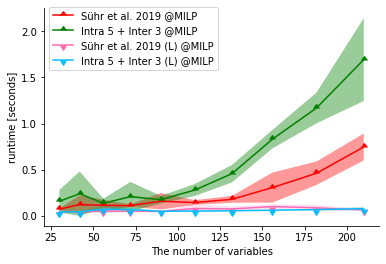

In [23]:
'''
CPLEX=MILP
docplexCPLEX CP=CP
TSSOS=SDP
'''


x,y,y1,y2=prep(time_inter0_cpF1)

plt.plot(x,y, color='red',marker=10,label='Sühr et al. 2019 @MILP')
plt.fill_between(x,y1,y2,facecolor = "red",alpha=0.4)

x,y,y1,y2=prep(time_inter3_cpF1)

plt.plot(x,y, color='g',marker=10,label='Intra 5 + Inter 3 @MILP')
plt.fill_between(x,y1,y2,facecolor = "green",alpha=0.4)


x,y,y1,y2=prep(time_inter0_cpF2)

plt.plot(x,y, color='hotpink',marker=11,label='Sühr et al. 2019 (L) @MILP')
plt.fill_between(x,y1,y2,facecolor = "hotpink",alpha=0.2)

x,y,y1,y2=prep(time_inter3_cpF2)

plt.plot(x,y, color='deepskyblue',marker=11,label='Intra 5 + Inter 3 (L) @MILP')
plt.fill_between(x,y1,y2,facecolor = "darkcyan",alpha=0.2)


plt.legend() # 显示图例

plt.xlabel('The number of variables')
plt.ylabel('runtime [seconds]')

plt.legend(title='', bbox_to_anchor=(0.0, 1.03), loc='upper left',frameon=True)

ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('runtime_zoomin.pdf', bbox_inches = 'tight')
